In [27]:
from IPython.display import clear_output
from utils_plotting import *
from stack import *

## stacking maps

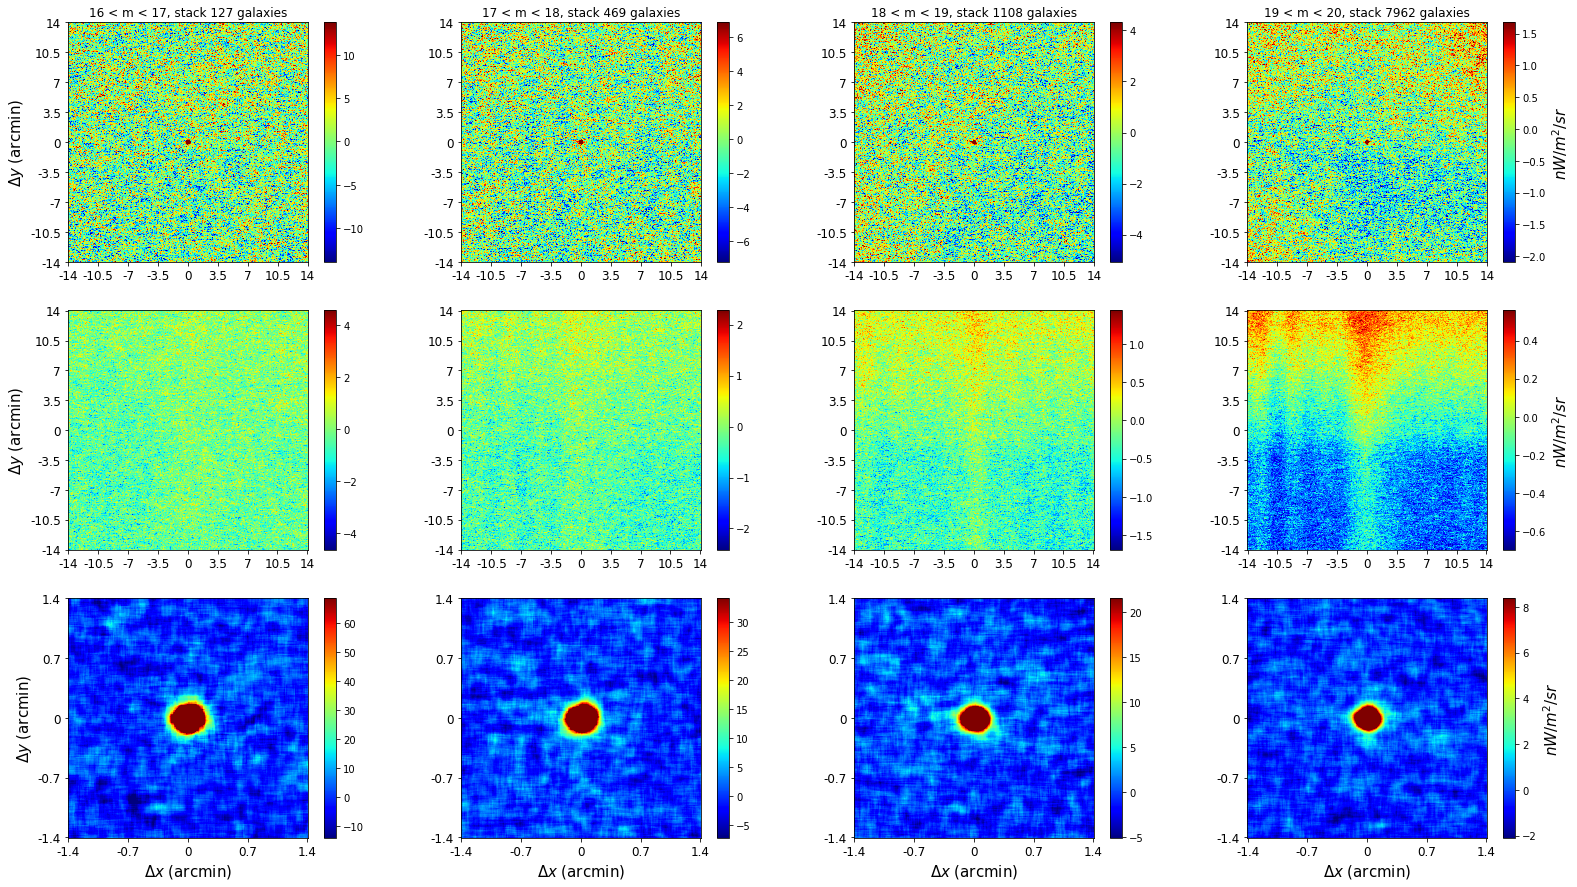

In [167]:
pixticks = np.linspace(0,2400,9)
pixtick_labels = ['-14', '-10.5', '-7', '-3.5', '0', '3.5', '7', '10.5', '14']

for ifield in [4,5,6,7,8]:
    for inst in [1,2]:
        plt.close()
        fig, ax = plt.subplots(3, 4, figsize = (27,15))
        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True).stackdat

            axi = ax[0][im]
            stackmap = stackdat['cbmapstack']
            if inst==2:
                stackmap = np.rot90(stackmap, k=3)
            p = imageclip(stackmap, ax=axi, return_objects=True)
            if im==3:
                p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
            axi.set_xticks(pixticks)
            axi.set_xticklabels(pixtick_labels, fontsize=12)
            axi.set_yticks(pixticks)
            axi.set_yticklabels(pixtick_labels, fontsize=12)
            if im==0:
                axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
            axi.set_title('%d < m < %d, stack %d galaxies'%(m_min, m_max, stackdat['Nsrc']))
            vmin, vmax = p['vmin'], p['vmax']

            axi = ax[1][im]
            stackmap = stackdat['cbmapstackBG']
            if inst==2:
                stackmap = np.rot90(stackmap, k=3)

            p = imageclip(stackmap, ax=axi, 
                          vmin=vmin/3, vmax=vmax/3, return_objects=True)
            if im==3:
                p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
            axi.set_xticks(pixticks/10)
            axi.set_xticklabels(pixtick_labels, fontsize=12)
            axi.set_yticks(pixticks/10)
            axi.set_yticklabels(pixtick_labels, fontsize=12)
            if im==0:
                axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

            axi = ax[2][im]
            stackmap = stackdat['cbmapstack'][1080:1321, 1080:1321]
            if inst==2:
                stackmap = np.rot90(stackmap, k=3)
            pixticks1 = np.linspace(0,240,5)
            pixtick_labels1 = ['-1.4', '-0.7', '0', '0.7', '1.4']
            p = imageclip(stackmap, ax=axi, return_objects=True, vmin=vmin, vmax=vmax*5)
            if im==3:
                p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
            axi.set_xticks(pixticks1)
            axi.set_xticklabels(pixtick_labels1, fontsize=12)
            axi.set_yticks(pixticks1)
            axi.set_yticklabels(pixtick_labels1, fontsize=12)
            axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
            if im==0:
                axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        plt.savefig('plots/paperfig/stackmaps_TM%d_%s.png'%(inst, fieldnamedict[ifield]),
                    dpi = 200, bbox_inches='tight')

## stacking & excess profile

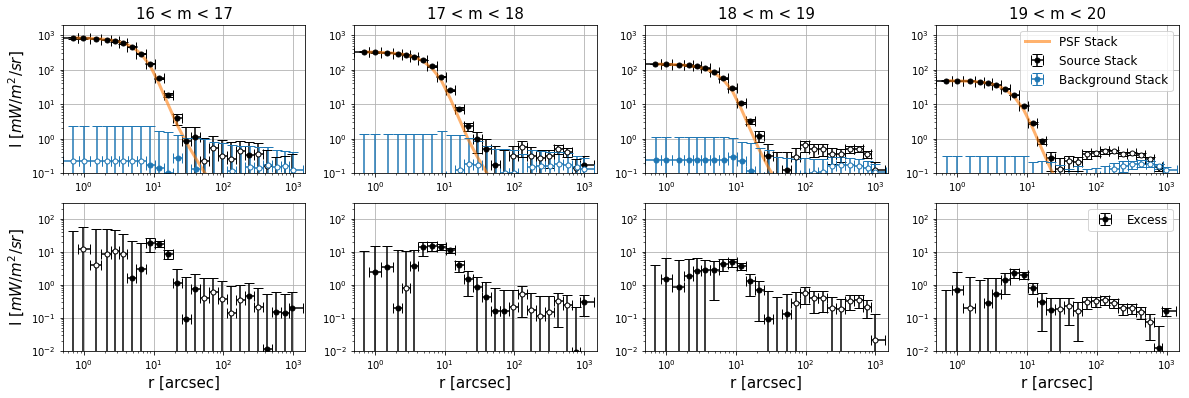

In [169]:
for ifield in [4,5,6,7,8]:
    for inst in [1,2]:
        plt.close()
        fig, ax = plt.subplots(2, 4, figsize = (20,6))
        for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
            stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True).stackdat
            plot_err_log(stackdat['rbins'], 
                         stackdat['profcb'],
                         np.sqrt(np.diag(stackdat['cov']['profcb'])),
                         ax=ax[0][im], color='k',label='Source Stack')
            ax[0][im].loglog(stackdat['rbins'],stackdat['PSF']['profcb'],
                          'C1', alpha=0.6, lw=3, label='PSF Stack')
            plot_err_log(stackdat['rbins']*1.01, 
                         stackdat['BG']['profcb'],
                         np.sqrt(np.diag(stackdat['BGcov']['profcb'])),
                         ax=ax[0][im], color='C0', label='Background Stack')
            ax[0][im].set_ylim([1e-1,2e3])
            ax[0][im].set_xlim([5e-1,1.5e3])
            ax[0][im].grid()    
            ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)

            plot_err_log(stackdat['rbins'], 
                         stackdat['ex']['profcb'],
                         np.sqrt(np.diag(stackdat['excov']['profcb'])),
                         ax=ax[1][im], color='k',label='Excess')
            ax[1][im].set_ylim([1e-2,3e2])
            ax[1][im].set_xlim([5e-1,1.5e3])
            ax[1][im].grid()    
            ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

        ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
        ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
        ax[0][-1].legend(fontsize=12)
        ax[1][-1].legend(fontsize=12)

        plt.savefig('plots/paperfig/profile_TM%d_%s.png'%(inst, fieldnamedict[ifield]),
                    dpi = 200, bbox_inches='tight')

## Average excess profile

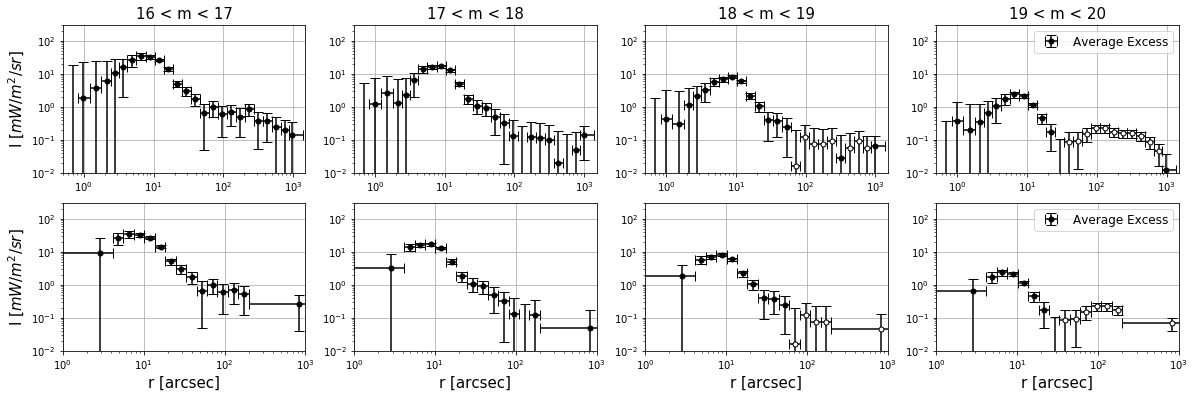

In [177]:
for inst in [1,2]:
    plt.close()
    fig, ax = plt.subplots(2, 4, figsize = (20,6))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        profd_arr, profd_err = 0, 0
        profdsub_arr, profdsub_err = 0, 0
        for ifield in [4,5,6,7,8]:
            stackdat = stacking(inst, ifield, m_min, m_max, load_from_file=True).stackdat
            profd_arri = stackdat['ex']['profcb']
            profd_erri = np.sqrt(np.diag(stackdat['excov']['profcb']))
            profd_arr += profd_arri / profd_erri**2
            profd_err += 1 / profd_erri**2
            profdsub_arri = stackdat['ex']['profcbsub']
            profdsub_erri = np.sqrt(np.diag(stackdat['excov']['profcbsub']))
            profdsub_arr += profdsub_arri / profdsub_erri**2
            profdsub_err += 1 / profdsub_erri**2

        profd_arr /= profd_err
        profd_err = np.sqrt(1 / profd_err)
        profdsub_arr /= profdsub_err
        profdsub_err = np.sqrt(1 / profdsub_err)

        plot_err_log(stackdat['rbins'], 
                 profd_arr,profd_err,
                 ax=ax[0][im], color='k',label='Average Excess')
        plot_err_log(stackdat['rsubbins'], 
                 profdsub_arr,profdsub_err,
                 xedges = stackdat['rsubbinedges'],
                 ax=ax[1][im], color='k',label='Average Excess')

        ax[0][im].set_ylim([1e-2,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        ax[1][im].set_ylim([1e-2,3e2])
        ax[1][im].set_xlim([1e0,1e3])
        ax[1][im].grid()    
        ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][-1].legend(fontsize=12)
    ax[1][-1].legend(fontsize=12)

    plt.savefig('plots/paperfig/profile_TM%d.png'%(inst),
                dpi = 200, bbox_inches='tight')

## Stacked Source Distribution

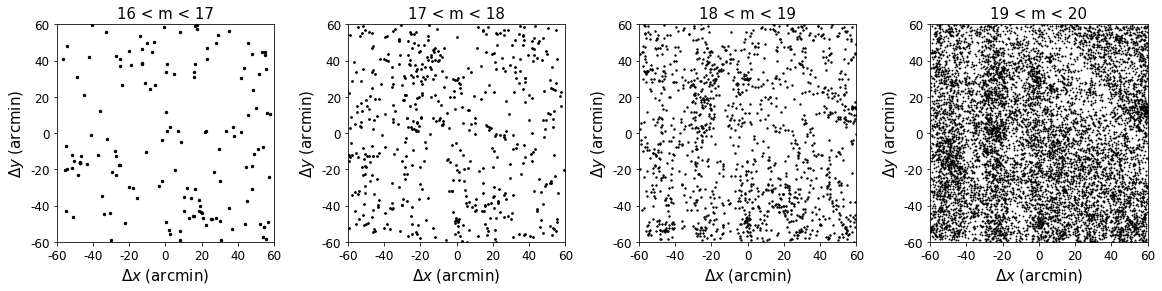

In [218]:
from stack import *

pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

for ifield in [4,5,6,7,8]:
    plt.close()
    fig, ax = plt.subplots(1, 4, figsize = (20,4))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        srcdat = ps_src_select(1, ifield, m_min, m_max, 
                       [np.ones((1024,1024)), np.ones((1024,1024))], sample_type='all')
        x, y = srcdat['xg_arr'], srcdat['yg_arr']
        ax[im].scatter(x,y, s=np.sqrt(5e3/len(x)), c='k')
        ax[im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[im].set_xlim([0,1023])
        ax[im].set_ylim([0,1023])
        ax[im].set_aspect('equal')   
        ax[im].set_xticks(pixticks)
        ax[im].set_xticklabels(pixtick_labels, fontsize=12)
        ax[im].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        ax[im].set_yticks(pixticks)
        ax[im].set_yticklabels(pixtick_labels, fontsize=12)
        ax[im].set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    
    plt.savefig('plots/paperfig/gal_scatter_%s.png'%(fieldnamedict[ifield]),
                dpi = 200, bbox_inches='tight')

## stars distribution

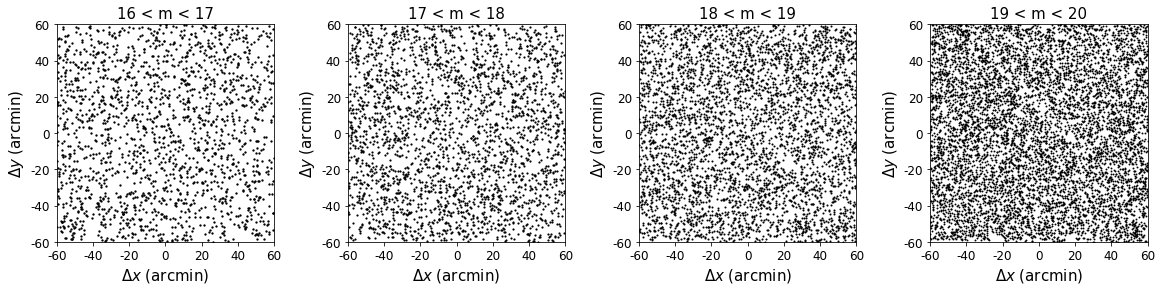

In [224]:
from stack import *

pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

for ifield in [8]:
    plt.close()
    fig, ax = plt.subplots(1, 4, figsize = (20,4))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        srcdat = ps_src_select(1, ifield, m_min, m_max, 
                       [np.ones((1024,1024)), np.ones((1024,1024))], sample_type='all')
        x, y = srcdat['xs_arr'], srcdat['ys_arr']
        ax[im].scatter(x,y, s=np.sqrt(5e3/len(x)), c='k')
        ax[im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[im].set_xlim([0,1023])
        ax[im].set_ylim([0,1023])
        ax[im].set_aspect('equal')   
        ax[im].set_xticks(pixticks)
        ax[im].set_xticklabels(pixtick_labels, fontsize=12)
        ax[im].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        ax[im].set_yticks(pixticks)
        ax[im].set_yticklabels(pixtick_labels, fontsize=12)
        ax[im].set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)


In [1]:
from stack import *
from IPython.display import clear_output

inst = 1
ifield = 8
im = 3
m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]
dx = 1200
profile = radial_prof(np.ones([2*dx+1,2*dx+1]), dx, dx)
rbins = profile['rbins']

stackdatg = stack_bigpix(inst, ifield, m_min, m_max, srctype='g')
stackdats = stack_bigpix(inst, ifield, m_min, m_max, srctype='s')
stackdatbg = stack_bigpix(inst, ifield, m_min, m_max, srctype='bg')

/Users/ytcheng/ciber/python_ciber/stack_modelfit/stack.py:956: RuntimeWarning: invalid value encountered in true_divide
  stackdat[isub]['profcb'] = profcb_arr/hit_arr


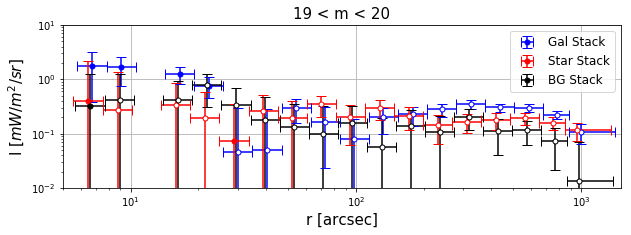

In [4]:
fig, ax = plt.subplots(1,1, figsize = (10,3))
plot_err_log(stackdatg['rbins']*1.02, 
             stackdatg['profcb'],
             stackdatg['profcb_err'],
             ax=ax, color='b',label='Gal Stack')
plot_err_log(stackdats['rbins']*0.98, 
             stackdats['profcb'],
             stackdats['profcb_err'],
             ax=ax, color='r',label='Star Stack')
plot_err_log(stackdatbg['rbins'], 
             stackdatbg['profcb'],
             stackdatbg['profcb_err'],
             ax=ax, color='k',label='BG Stack')

ax.set_ylim([1e-2,1e1])
ax.set_xlim([5e0,1.5e3])
ax.grid()    
ax.set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
ax.set_xlabel('r [arcsec]', fontsize=15)
ax.set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
ax.legend(fontsize=12)